In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk import ngrams
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score
import string
from nltk.tokenize import word_tokenize
import spacy
from spacy import displacy
from collections import Counter

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
d1 = pd.read_csv("C:/Users/HP/Downloads/Elon_musk.csv",encoding='ISO-8859-1')
d1

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [45]:
with open("C:/Users/HP/Downloads/positive-words.txt","r")as file:
    positive_words = file.read()

In [46]:
positive_words_list = [line.strip() for line in positive_words.split('\n') if not line.startswith(';') and line.strip()]
positive_words_list

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [47]:
with open("C:/Users/HP/Downloads/stop.txt", "r") as file:
    stopwords = file.read().splitlines()

In [48]:
stopwords

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [49]:
translator = str.maketrans("", "", string.punctuation)
d1['Text'] = d1['Text'].apply(lambda text: text.translate(translator))

In [50]:
# Perform sentiment analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [51]:
translator = str.maketrans("", "", string.punctuation)
d1['Text'] = d1['Text'].apply(lambda text: text.translate(translator))

In [52]:
d1['Sentiment_Score'] = d1['Text'].apply(lambda text: sia.polarity_scores(text)['compound'])
d1['Sentiment_Score']

0       0.0000
1       0.0000
2       0.6249
3      -0.2732
4       0.8271
         ...  
1994   -0.4215
1995    0.5994
1996    0.0000
1997   -0.7003
1998    0.4215
Name: Sentiment_Score, Length: 1999, dtype: float64

In [53]:
d1

,Unnamed: 0,Text,Sentiment_Score
0,1,kunalb11 Im an alien,0.0000
1,2,IDAACarmack Ray tracing on Cyberpunk with HDR ...,0.0000
2,3,joerogan Spotify Great interview,0.6249
3,4,gtera27 Doge is underestimated,-0.2732
4,5,teslacn Congratulations Tesla China for amazin...,0.8271
...,...,...,...
1994,1995,flcnhvy True it sounds so surreal but the nega...,-0.4215
1995,1996,PPathole Make sure to read ur terms amp condit...,0.5994
1996,1997,TeslaGong PPathole Samwise Gamgee,0.0000
1997,1998,PPathole Altho Dumb and Dumber is U0001F525U00...,-0.7003


In [54]:
d1['Sentiment_Label'] = d1['Sentiment_Score'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')
d1

,Unnamed: 0,Text,Sentiment_Score,Sentiment_Label
0,1,kunalb11 Im an alien,0.0000,neutral
1,2,IDAACarmack Ray tracing on Cyberpunk with HDR ...,0.0000,neutral
2,3,joerogan Spotify Great interview,0.6249,positive
3,4,gtera27 Doge is underestimated,-0.2732,negative
4,5,teslacn Congratulations Tesla China for amazin...,0.8271,positive
...,...,...,...,...
1994,1995,flcnhvy True it sounds so surreal but the nega...,-0.4215,negative
1995,1996,PPathole Make sure to read ur terms amp condit...,0.5994,positive
1996,1997,TeslaGong PPathole Samwise Gamgee,0.0000,neutral
1997,1998,PPathole Altho Dumb and Dumber is U0001F525U00...,-0.7003,negative


In [55]:
x = d1['Text']
x

0                                   kunalb11 Im an alien
1       IDAACarmack Ray tracing on Cyberpunk with HDR ...
2                        joerogan Spotify Great interview
3                          gtera27 Doge is underestimated
4       teslacn Congratulations Tesla China for amazin...
                              ...                        
1994    flcnhvy True it sounds so surreal but the nega...
1995    PPathole Make sure to read ur terms amp condit...
1996                    TeslaGong PPathole Samwise Gamgee
1997    PPathole Altho Dumb and Dumber is U0001F525U00...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [56]:
y = d1['Sentiment_Label']
y

0        neutral
1        neutral
2       positive
3       negative
4       positive
          ...   
1994    negative
1995    positive
1996     neutral
1997    negative
1998    positive
Name: Sentiment_Label, Length: 1999, dtype: object

In [57]:
vectorizer = CountVectorizer(stop_words=stopwords)

In [58]:
Vectorizer = CountVectorizer()
Vt = Vectorizer.fit_transform(d1['Text'])
Vt.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [59]:
transformer = TfidfTransformer().fit(Vt)
x_vect = transformer.transform(Vt)
x_vect

<1999x5498 sparse matrix of type '<class 'numpy.float64'>'
	with 19828 stored elements in Compressed Sparse Row format>

In [60]:
logreg = LogisticRegression()

In [61]:
training_accuracy = []
test_accuracy = []

In [62]:
for i in range(1,1001):
    X_train,X_test,Y_train,Y_test = train_test_split(x_vect,y,test_size=0.30,random_state=i)
    logreg.fit(X_train,Y_train)
    Y_pred_train = logreg.predict(X_train)
    Y_pred_test  = logreg.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train ,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test ,Y_pred_test))
print("Average training accuracy:",np.mean(training_accuracy).round(3))
print("Average test accuracy:",np.mean(test_accuracy).round(3))

NameError: name 'np' is not defined

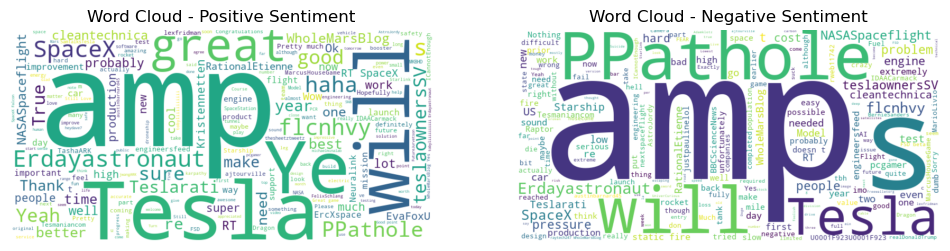

In [23]:
# Display the word cloud using Matplotlib
positive_text = " ".join(d1[d1['Sentiment_Label'] == 'positive']['Text'])
negative_text = " ".join(d1[d1['Sentiment_Label'] == 'negative']['Text'])

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Positive Sentiment')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Negative Sentiment')
plt.axis('off')

plt.show()

In [ ]:
d1 = pd.DataFrame({
    'Text': ["great"]
})

In [ ]:
# Display N-grams and Bi-grams
def extract_ngrams(text, n):
    tokens = nltk.word_tokenize(text)
    ngrams = list(nltk.ngrams(tokens, n))
    return [' '.join(gram) for gram in ngrams]

d1['ngrams'] = d1['Text'].apply(lambda x: extract_ngrams(x, 2))

In [ ]:
tokens = word_tokenize("ngrams")

In [ ]:
def generate_ngrams(text, n):
    tokens = word_tokenize(text)
    return list(ngrams(tokens, n))

In [ ]:
n = 10

In [ ]:
for index, row in d1.iterrows():
    text_data = row['Text']
    ngrams_result = generate_ngrams(text_data, n)

In [63]:
for index, row in d1.iterrows():
    text_data = row['Text']
    ngrams_result = generate_ngrams(text_data, n)

    print(f"\n{n}-grams for row {index}: {ngrams_result}")


3-grams for row 0: [('kunalb11', 'I\x92m', 'an'), ('I\x92m', 'an', 'alien')]

3-grams for row 1: [('IDAACarmack', 'Ray', 'tracing'), ('Ray', 'tracing', 'on'), ('tracing', 'on', 'Cyberpunk'), ('on', 'Cyberpunk', 'with'), ('Cyberpunk', 'with', 'HDR'), ('with', 'HDR', 'is'), ('HDR', 'is', 'nextlevel'), ('is', 'nextlevel', 'Have'), ('nextlevel', 'Have', 'you'), ('Have', 'you', 'tried'), ('you', 'tried', 'it')]

3-grams for row 2: [('joerogan', 'Spotify', 'Great'), ('Spotify', 'Great', 'interview')]

3-grams for row 3: [('gtera27', 'Doge', 'is'), ('Doge', 'is', 'underestimated')]

3-grams for row 4: [('teslacn', 'Congratulations', 'Tesla'), ('Congratulations', 'Tesla', 'China'), ('Tesla', 'China', 'for'), ('China', 'for', 'amazing'), ('for', 'amazing', 'execution'), ('amazing', 'execution', 'last'), ('execution', 'last', 'year'), ('last', 'year', 'Now'), ('year', 'Now', 'on'), ('Now', 'on', 'to'), ('on', 'to', 'the'), ('to', 'the', 'next'), ('the', 'next', 'for'), ('next', 'for', 'even'), 

In [34]:
d1

,Unnamed: 0,Text,Sentiment_Score,Sentiment_Label,ngrams
0,1,kunalb11 Im an alien,0.0000,neutral,"[kunalb11 Im, Im an, an alien]"
1,2,IDAACarmack Ray tracing on Cyberpunk with HDR ...,0.0000,neutral,"[IDAACarmack Ray, Ray tracing, tracing on, on ..."
2,3,joerogan Spotify Great interview,0.6249,positive,"[joerogan Spotify, Spotify Great, Great interv..."
3,4,gtera27 Doge is underestimated,-0.2732,negative,"[gtera27 Doge, Doge is, is underestimated]"
4,5,teslacn Congratulations Tesla China for amazin...,0.8271,positive,"[teslacn Congratulations, Congratulations Tesl..."
...,...,...,...,...,...
1994,1995,flcnhvy True it sounds so surreal but the nega...,-0.4215,negative,"[flcnhvy True, True it, it sounds, sounds so, ..."
1995,1996,PPathole Make sure to read ur terms amp condit...,0.5994,positive,"[PPathole Make, Make sure, sure to, to read, r..."
1996,1997,TeslaGong PPathole Samwise Gamgee,0.0000,neutral,"[TeslaGong PPathole, PPathole Samwise, Samwise..."
1997,1998,PPathole Altho Dumb and Dumber is U0001F525U00...,-0.7003,negative,"[PPathole Altho, Altho Dumb, Dumb and, and Dum..."


In [40]:
# Perform Named Entity Recognition (NER)
nlp = spacy.load('en_core_web_sm')

def get_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

d1['entities'] = d1['Text'].apply(get_entities)

In [41]:
d1

,Unnamed: 0,Text,Sentiment_Score,Sentiment_Label,ngrams,entities
0,1,kunalb11 Im an alien,0.0000,neutral,"[kunalb11 Im, Im an, an alien]","[(kunalb11, ORG)]"
1,2,IDAACarmack Ray tracing on Cyberpunk with HDR ...,0.0000,neutral,"[IDAACarmack Ray, Ray tracing, tracing on, on ...","[(IDAACarmack Ray, PERSON), (HDR, ORG)]"
2,3,joerogan Spotify Great interview,0.6249,positive,"[joerogan Spotify, Spotify Great, Great interv...","[(joerogan Spotify Great, PERSON)]"
3,4,gtera27 Doge is underestimated,-0.2732,negative,"[gtera27 Doge, Doge is, is underestimated]",[]
4,5,teslacn Congratulations Tesla China for amazin...,0.8271,positive,"[teslacn Congratulations, Congratulations Tesl...","[(China, GPE), (last year, DATE)]"
...,...,...,...,...,...,...
1994,1995,flcnhvy True it sounds so surreal but the nega...,-0.4215,negative,"[flcnhvy True, True it, it sounds, sounds so, ...",[]
1995,1996,PPathole Make sure to read ur terms amp condit...,0.5994,positive,"[PPathole Make, Make sure, sure to, to read, r...","[(PPathole Make, ORG)]"
1996,1997,TeslaGong PPathole Samwise Gamgee,0.0000,neutral,"[TeslaGong PPathole, PPathole Samwise, Samwise...","[(TeslaGong PPathole Samwise Gamgee, ORG)]"
1997,1998,PPathole Altho Dumb and Dumber is U0001F525U00...,-0.7003,negative,"[PPathole Altho, Altho Dumb, Dumb and, and Dum...","[(PPathole Altho Dumb and Dumber, PERSON), (U0..."
